In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
#import the csv file
insuranceDF = pd.read_csv("insurance.csv", header = 0)

In [3]:
#perform some EDA 
insuranceDF.shape

(1338, 7)

In [4]:
insuranceDF.dtypes #to check the type of all the columns in dataframe

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#check for any null values
insuranceDF.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#check 5 point summary of numerical columns
insuranceDF.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


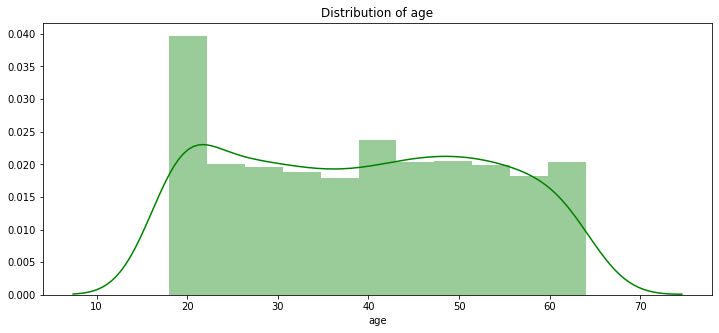

In [8]:
#Plot the distribution for 'age'
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(insuranceDF["age"], color = 'g')

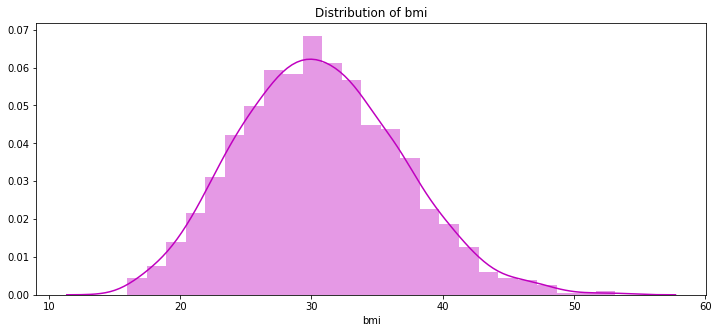

In [9]:
#Plot the distribution for 'bmi'
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(insuranceDF["bmi"], color = 'm')

Text(0.5, 1.0, 'Distribution of charges for smokers')

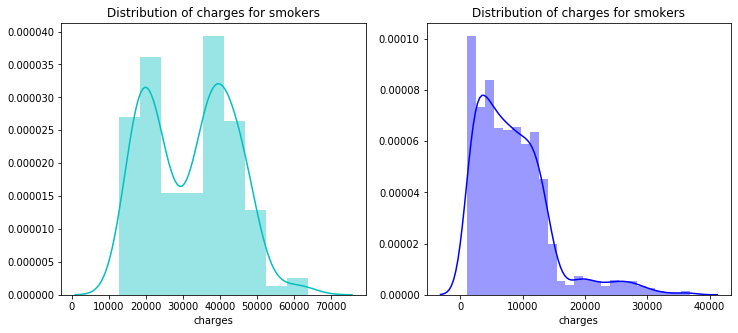

In [10]:
#Plot the distribution for 'charges'
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insuranceDF[(insuranceDF.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(insuranceDF[(insuranceDF.smoker == 'no')]["charges"],color='b',ax=ax)
ax.set_title('Distribution of charges for smokers')

In [11]:
#measure the skewness of bmi
insuranceDF['bmi'].skew()

0.2840471105987448

In [12]:
#measure the skewness of age
insuranceDF['age'].skew()

0.05567251565299186

In [13]:
#measure the skewness of charges
insuranceDF['charges'].skew()

1.5158796580240388

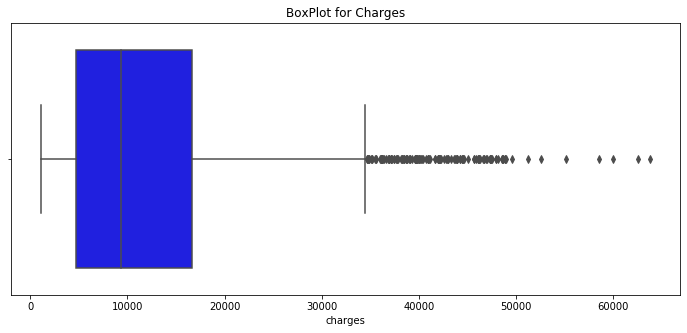

In [14]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns using Boxplot
plt.figure(figsize=(12,5))
plt.title("BoxPlot for Charges")
ax = sns.boxplot(insuranceDF['charges'], color='b')

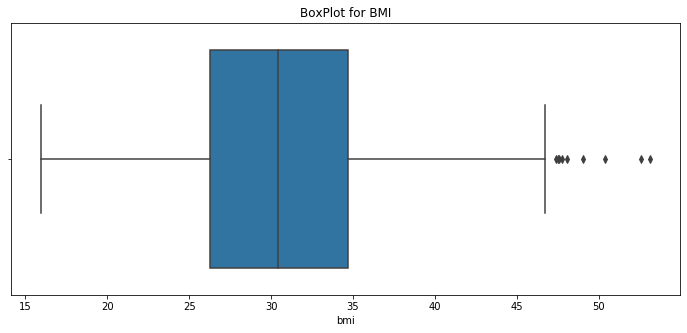

In [15]:
plt.figure(figsize=(12,5))
plt.title('BoxPlot for BMI')
ax = sns.boxplot(insuranceDF['bmi'])

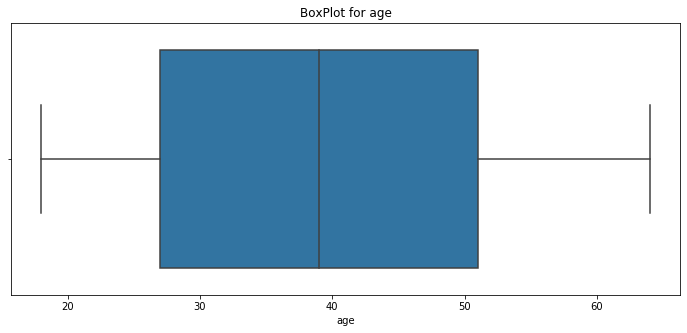

In [16]:
plt.figure(figsize=(12,5))
plt.title('BoxPlot for age')
ax = sns.boxplot(insuranceDF['age'])

-> bmi has a few extreme values and

-> charges is highly skewed, there are quiet a lot of extreme values

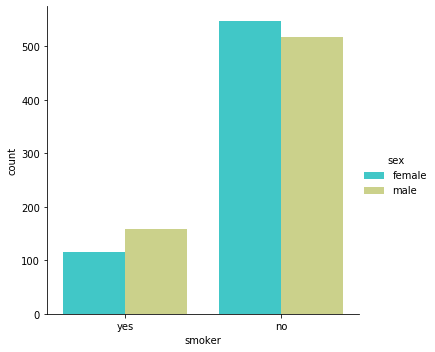

In [17]:
# Distribution of categorical columns 
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=insuranceDF)

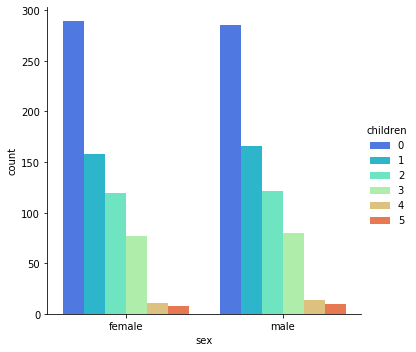

In [18]:
#Distribution of Children column
sns.catplot(x="sex", kind="count",hue = 'children', palette="rainbow", data=insuranceDF)

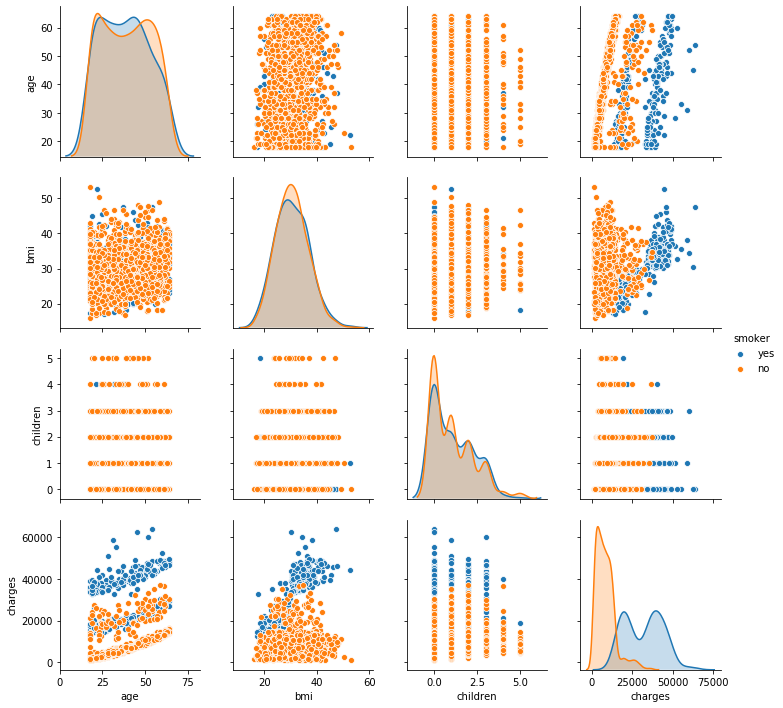

In [19]:
#pairplot to visualize the dataframe
sns.pairplot(insuranceDF, hue='smoker')

# Do charges of people who smoke differ significantly  from the people who don't? 

In [20]:
smoker = insuranceDF[insuranceDF['smoker']=='yes']
non_smoker = insuranceDF[insuranceDF['smoker']=='no']

In [21]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

statistic, pvalue = stats.ttest_ind(non_smoker['charges'], smoker['charges'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}".format(pvalue,statistic))

2 sample, 2 sided t-test pvalue:  5.88946444671698e-103 t-stat: -32.751887766341824


Result from the T-test shows that pvalue < significance level(0.05), Hence we reject the Null Hypothesis-Ho, Charges of smoker and non-smoker are not the same.

# Does bmi of males differ significantly from that of  females? 

In [22]:
male = insuranceDF[insuranceDF['sex']=='male']
female = insuranceDF[insuranceDF['sex']=='female']

In [23]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

statistic1, pvalue1 = stats.ttest_ind(female['bmi'], male['bmi'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:{}, t-stat: {}".format(pvalue1,statistic1))

2 sample, 2 sided t-test pvalue:0.08992430667834876, t-stat: -1.697027933124022


Result from the T-test shows that pvalue > significance level(0.05), Hence we cannot reject the Null Hypothesis-Ho, Gender has no effect on bmi.

# Is the proportion of smokers significantly different  in different genders?

In [24]:
contingency_table =pd.crosstab(insuranceDF['sex'],insuranceDF['smoker'])
print(contingency_table)

smoker   no  yes
sex             
female  547  115
male    517  159


In [26]:
# Chi_square test to check if smoking is significantly different for different genders
Ho = "Gender has no effect on smoking"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking"   # Stating the Alternate Hypothesis

chi_sq_Stat, p_value, deg_freedom, exp_freq = chi2_contingency(contingency_table)
print("Chi Square Test p_value:{}, chi-square-stat: {}".format(p_value,chi_sq_Stat))

Chi Square Test p_value:0.006548143503580696, chi-square-stat: 7.39291081459996


Result from the ChiSquare-test shows that pvalue < significance level(0.05), Hence we reject the Null Hypothesis-Ho, Gender has some effect on smoking.

# Is the distribution of bmi across women with no  children, one child and two children, the same ? 

In [27]:
zero = female[female.children == 0]['bmi']
one = female[female.children == 1]['bmi']
two = female[female.children == 2]['bmi']

In [28]:
# F-Test to see if the distributions of bmi across women is different for different number of children
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

f_stat, p_value1 = stats.f_oneway(zero,one,two)
print("F Test pvalue:  {} f-stat: {}".format(p_value1,f_stat))

F Test pvalue:  0.7158579926754841 f-stat: 0.3344720147757968


Result from the F-test shows that pvalue > significance level(0.05) significantly, Hence we cannot reject the Null Hypothesis-Ho, No. of children has no effect on bmi.